In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT, force_remount=True)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [ ]:
%cd 'drive/My Drive/Workspaces/face_mask_detection'

/content/drive/My Drive/Workspaces/face_mask_detection


In [ ]:
import tensorflow as tf
# import handwritten digit datasets
mnist = tf.keras.datasets.mnist 
(X_train, y_train), (X_test,y_test) = mnist.load_data()

# Pixel values vary from 0-255
# We normalize it so that it becomes easier for the NN to learn

X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [ ]:
model = tf.keras.models.Sequential()
# We have images of dimensions 28x28
# we flatten the image using layers.Flatten()
# NOTE: we can also use numpy reshape and other methods.
model.add(tf.keras.layers.Flatten())

# we add 2 layers of NN. 128 neurons in each layer. Activation function used is ReLU.
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#we add the output layer. Each neuron in the output layer represents a single output.
# We have 10 digits to recognize. So num_N = 10
# We need a probability distribution so we use softmax activation function.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2590 - accuracy: 0.9247
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1084 - accuracy: 0.9661
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0736 - accuracy: 0.9770


In [ ]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0968 - accuracy: 0.9694
0.09676893800497055 0.9693999886512756


In [ ]:
model.save('number_reader_model')
model2 = tf.keras.models.load_model('number_reader_model')

#Predict method always takes a list
pred = model2.predict([X_test])
pred

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: number_reader_model/assets


array([[2.5585716e-09, 7.9423721e-09, 3.2748045e-07, ..., 9.9999094e-01,
        1.0437523e-08, 2.5471047e-07],
       [1.3294343e-09, 2.5139817e-03, 9.9748212e-01, ..., 4.6547484e-08,
        3.1399392e-08, 3.1936771e-12],
       [1.4399102e-07, 9.9989927e-01, 4.6902492e-06, ..., 4.3599539e-05,
        4.0174127e-05, 1.8830949e-06],
       ...,
       [2.5915632e-08, 6.7160283e-07, 6.9365598e-08, ..., 3.1923901e-04,
        2.9330433e-06, 3.0193391e-04],
       [1.8659846e-05, 4.6496272e-05, 8.5363240e-08, ..., 2.8372227e-05,
        8.6931493e-03, 3.6506078e-06],
       [9.3340833e-07, 8.4246676e-07, 3.8977061e-07, ..., 1.9862940e-08,
        4.4311108e-08, 1.7754259e-08]], dtype=float32)

4


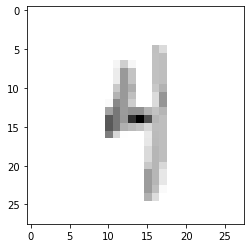

In [ ]:
import numpy as np
print(np.argmax(pred[65]))
plt.imshow(X_test[65], cmap = plt.cm.binary)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()